In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json, os

In [166]:
run = 1
Gamma0 = 20.00
rhoseed = 0.5#0.9#0.16
Pii      = 0.03

datadir = '../../data/model_Q_v_rho/gamma0_{:1.2f}_rhoseed_{:1.2f}_pi_{:1.3f}/run_{:d}/'.format(Gamma0, rhoseed, Pii, run)

savedir = datadir+'videos/'

if not os.path.isdir(savedir):
    os.mkdir(savedir)

with open(datadir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
gamma     = parameters["gammaf"]   # traction coefficient
lambd     = parameters["lambda"]
#mu        = parameters["mu"]
p0        = parameters["p0"]       # pressure when cells are close packed, should be very high
r_p       = parameters["r_p"]      # rate of pressure growth equal to rate of growth of cells
rho_in    = parameters["rho_in"]   # isotropic to nematic transition density, or "onset of order in the paper"
rhoisoend = parameters["rhoisoend"] /rho_in   # jamming density
rhonemend = parameters["rhonemend"] /rho_in   # jamming density max for nematic substrate
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])

#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, 1-tol, mx)
y   = np.linspace(0+tol, 1-tol, my)
xv, yv  = np.meshgrid(x,y)

dx = 1/mx; dy = 1/my

times = np.arange(0, n_dump, 1)*dt_dump

In [167]:
#ndump = 29; times = np.arange(0, ndump+1, 1)*dt_dump
rho = np.zeros([n_dump, mx, my])
v   = np.zeros([n_dump, mx, my, 2])
Q   = np.zeros([n_dump, mx, my, 2])
Gamma = np.zeros([n_dump, mx, my])
Pressure = np.zeros([n_dump, mx, my])


i=0
for n in np.arange(0, n_steps-1, dn_dump):
    rho[i] += np.loadtxt(datadir+'rho.csv.{:d}'.format(n), delimiter=',')
    Gamma[i] += np.loadtxt(datadir+'Gamma.csv.{:d}'.format(n), delimiter=',')
    Pressure[i] += np.loadtxt(datadir+'pressure.csv.{:d}'.format(n), delimiter=',')
    v[i,:,:,0] += np.loadtxt(datadir+'vx.csv.{:d}'.format(n), delimiter=',')
    v[i,:,:,1] += np.loadtxt(datadir+'vy.csv.{:d}'.format(n), delimiter=',')
    Q[i,:,:,0] += np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
    Q[i,:,:,1] += np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
    i+=1

S     = np.sqrt(2*(np.square(Q[...,0])+np.square(Q[...,1])))
theta = np.arctan2(Q[...,1], Q[...,0])/2
nx    = np.cos(theta)
ny    = np.sin(theta)

459.8731608013071 -1176.339997064635


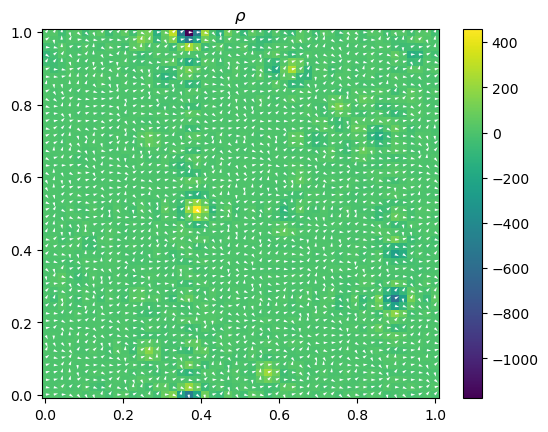

In [172]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
field = v[...,0]
i=5
fmax = np.max(field[i]); fmin=np.min(field[i]); print(fmax, fmin)
ctrf = [ax.pcolormesh(xv, yv, field[i], vmin=fmin, vmax=fmax), ax.quiver(xv,yv,nx[i],ny[i], color='w')]
plt.colorbar(ctrf[0])
plt.title(r"$\rho$")
plt.show()

0.27930138588774966 0.021661109699633405


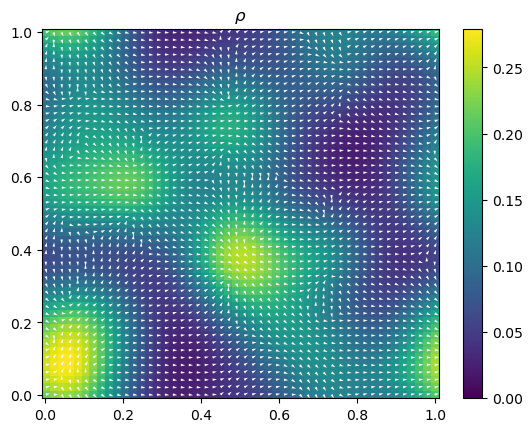

In [176]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
field = rho
i=200
fmax = np.max(field[i]); fmin=np.min(field[i]); print(fmax, fmin)
ctrf = [ax.pcolormesh(xv, yv, field[i], vmin=0, vmax=fmax), ax.quiver(xv,yv,nx[i],ny[i], color='w')]
plt.colorbar(ctrf[0])
plt.title(r"$\rho$")
plt.show()

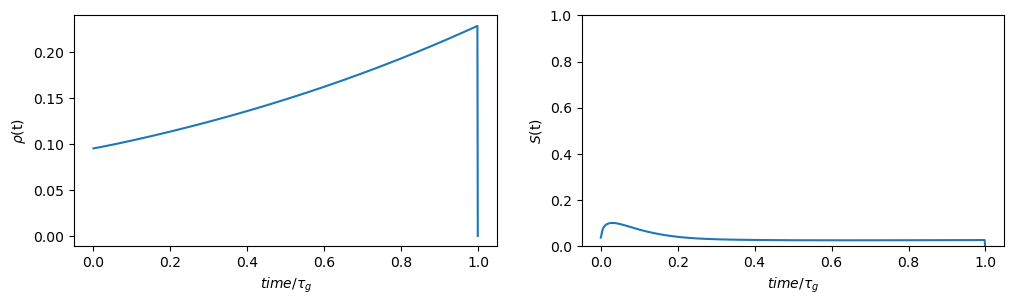

In [165]:
Rho = np.sum(np.sum(rho, axis=2), axis=1)*dx*dy #integrated rho over all space divided by unit area
Ssum= np.sum(np.sum(S, axis=2), axis=1)*dx*dy
fig, ax = plt.subplots(figsize=(12,3), ncols=2)
ax[0].plot(times, Rho); ax[0].set_xlabel(r'$time/\tau_g$'); ax[0].set_ylabel(r'$\rho$(t)');
ax[1].plot(times, Ssum); ax[1].set_xlabel(r'$time/\tau_g$'); ax[1].set_ylabel(r'$S$(t)');
ax[1].set_ylim(0,1);

0.40571814604028145
0.0 0.0


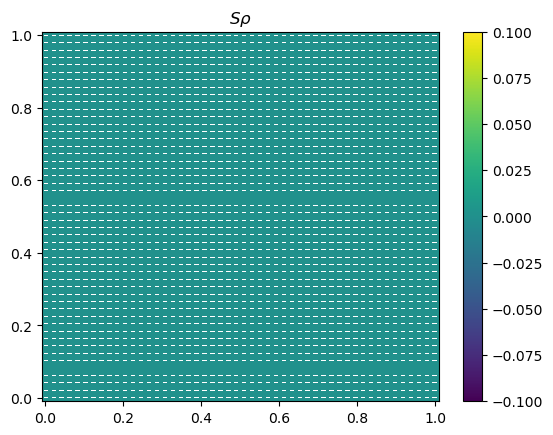

In [161]:
fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
plotfield = S#rho*S
fmax = np.max(plotfield); print(fmax)
i=-1
print(np.max(plotfield[i]), np.min(plotfield[i]))
ctrf = [ax.pcolormesh(xv, yv, plotfield[i], cmap='viridis', vmin=0, vmax=np.max(plotfield[i])), ax.quiver(xv,yv,nx[i,:,:],ny[i,:,:], color='w', pivot='middle', headlength=0, headaxislength=0)]
#ctrf = [ax.pcolormesh(xv, yv, rho[i], cmap=cmap1, vmin=np.min(rho), vmax=np.max(rho)), ax.quiver(xv,yv,nx[i],ny[i], color='w', headlength=0, headaxislength=0, width=0.006, pivot='middle')]
#ctrf = [ax.pcolormesh(xv, yv, rho[i]*v[i,:,:,1])]
plt.colorbar(ctrf[0])
plt.title(r"$ S \rho $")
plt.show()